<h1>Estudo de Mercado: Padrões de Consumo de Gás por Bairro<h1> 

In [34]:
import pandas as pd

# Dados ajustados
dados_vendas = {
    "Data": [
        "2025-07-01", "2025-07-02", "2025-07-03", "2025-07-04", "2025-07-05",
        "2025-07-06", "2025-07-07", "2025-07-08", "2025-07-09", "2025-07-10",
        "2025-07-11", "2025-07-12", "2025-07-13", "2025-07-14", "2025-07-15",
        "2025-07-16", "2025-07-17"
    ],
    "Cliente": [
        "Ana", "Bruno", "Camila", "Daniel", "Eduarda",
        "Fábio", "Giovana", "Henrique", "Isabela", "Jorge",
        "Karen", "Leonardo", "Mariana", "Nathan", "Olívia",
        "Pedro", "Renata"
    ],
    "Bairro": [
        "Centro", "Cachoeirinha", "Raiz", "Educandos", "Flores",
        "Aleixo", "Coroado", "Praça 14 de janeiro", "Parque 10 de novembro", "Santo Antonio",
        "Gloria", "São Raimundo", "Compensa", "São Francisco", "Betânia",
        "Aparecida", "São Geraldo"
    ],
    "Produto": [
        "Gás 13kg", "Gás 13kg", "Gás 13kg", "Gás 13kg", "Gás 8kg",
        "Gás 10kg", "Gás 13kg", "Gás 10kg", "Gás 5kg", "Gás 5kg",
        "Gás 5kg", "Gás 45kg", "Gás 8kg", "Gás 10kg", "Gás 13kg",
        "Gás 20kg", "Gás 13kg"
    ],
    "Valor": [
        132, 132, 132, 132, 97,
        115, 137, 115, 75, 75,
        510, 510, 97, 115, 132,
        300, 132
    ],
    "Forma_Pagamento": [
        "Pix", "Dinheiro", "Dinheiro", "Pix", "Pix",
        "Pix", "Cartão", "Dinheiro", "Pix", "Pix",
        "Pix", "Dinheiro", "Dinheiro", "Dinheiro", "Dinheiro",
        "Dinheiro", "Pix"
    ]
}

# Criando o DataFrame
df = pd.DataFrame(dados_vendas)

# Exibindo a tabela de forma legível
print(df.to_string(index=False))


      Data  Cliente                Bairro  Produto  Valor Forma_Pagamento
2025-07-01      Ana                Centro Gás 13kg    132             Pix
2025-07-02    Bruno          Cachoeirinha Gás 13kg    132        Dinheiro
2025-07-03   Camila                  Raiz Gás 13kg    132        Dinheiro
2025-07-04   Daniel             Educandos Gás 13kg    132             Pix
2025-07-05  Eduarda                Flores  Gás 8kg     97             Pix
2025-07-06    Fábio                Aleixo Gás 10kg    115             Pix
2025-07-07  Giovana               Coroado Gás 13kg    137          Cartão
2025-07-08 Henrique   Praça 14 de janeiro Gás 10kg    115        Dinheiro
2025-07-09  Isabela Parque 10 de novembro  Gás 5kg     75             Pix
2025-07-10    Jorge         Santo Antonio  Gás 5kg     75             Pix
2025-07-11    Karen                Gloria  Gás 5kg    510             Pix
2025-07-12 Leonardo          São Raimundo Gás 45kg    510        Dinheiro
2025-07-13  Mariana              Compe

In [35]:
total_vendas = df["Valor"].sum()
print("Total faturado no período: R$", total_vendas)


Total faturado no período: R$ 2938


In [36]:
ticket_medio = df["Valor"].mean()
print("Ticket médio por venda: R$", round(ticket_medio, 2))


Ticket médio por venda: R$ 172.82


In [37]:
vendas_por_produto = df.groupby("Produto")["Valor"].sum().sort_values(ascending=False)
print("\nFaturamento por tipo de gás:")
print(vendas_por_produto)



Faturamento por tipo de gás:
Produto
Gás 13kg    929
Gás 5kg     660
Gás 45kg    510
Gás 10kg    345
Gás 20kg    300
Gás 8kg     194
Name: Valor, dtype: int64


In [38]:
quantidade_por_produto = df["Produto"].value_counts()
print("\nQuantidade de vendas por tipo de gás:")
print(quantidade_por_produto)



Quantidade de vendas por tipo de gás:
Produto
Gás 13kg    7
Gás 10kg    3
Gás 5kg     3
Gás 8kg     2
Gás 45kg    1
Gás 20kg    1
Name: count, dtype: int64


In [39]:
media = df["Valor"].mean()
mediana = df["Valor"].median()
moda = df["Valor"].mode()[0]

print(f"Média (Ticket médio): R$ {media:.2f}")
print(f"Mediana: R$ {mediana:.2f}")
print(f"Moda: R$ {moda:.2f}")


Média (Ticket médio): R$ 172.82
Mediana: R$ 132.00
Moda: R$ 132.00


In [40]:
desvio_padrao = df["Valor"].std()
variancia = df["Valor"].var()
valor_min = df["Valor"].min()
valor_max = df["Valor"].max()
amplitude = valor_max - valor_min

print(f"Desvio Padrão: R$ {desvio_padrao:.2f}")
print(f"Variância: R$ {variancia:.2f}")
print(f"Valor mínimo: R$ {valor_min}")
print(f"Valor máximo: R$ {valor_max}")
print(f"Amplitude: R$ {amplitude}")


Desvio Padrão: R$ 135.90
Variância: R$ 18468.78
Valor mínimo: R$ 75
Valor máximo: R$ 510
Amplitude: R$ 435


In [41]:
print(df["Valor"].describe())


count     17.000000
mean     172.823529
std      135.899887
min       75.000000
25%      115.000000
50%      132.000000
75%      132.000000
max      510.000000
Name: Valor, dtype: float64


In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Preparar os dados
df["Data"] = pd.to_datetime(df["Data"])
df["Dia"] = df["Data"].dt.day

X = df[["Dia"]]  # variável independente
y = df["Valor"]  # variável dependente

# Regressão Linear
modelo = LinearRegression()
modelo.fit(X, y)

# Resultados
print("Coeficiente angular (slope):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print("Score R²:", modelo.score(X, y))


Coeficiente angular (slope): 7.3088235294117645
Intercepto: 107.04411764705881
Score R²: 0.07375592912363227


In [43]:
from sklearn.preprocessing import LabelEncoder

# Codificar os produtos como números
le = LabelEncoder()
df["Produto_Cod"] = le.fit_transform(df["Produto"])

X = df[["Produto_Cod"]]
y = df["Valor"]

modelo_produto = LinearRegression()
modelo_produto.fit(X, y)

print("Coeficiente angular:", modelo_produto.coef_[0])
print("Intercepto:", modelo_produto.intercept_)
print("Score R²:", modelo_produto.score(X, y))


Coeficiente angular: 15.860000000000001
Intercepto: 141.1035294117647
Score R²: 0.042561624267344556


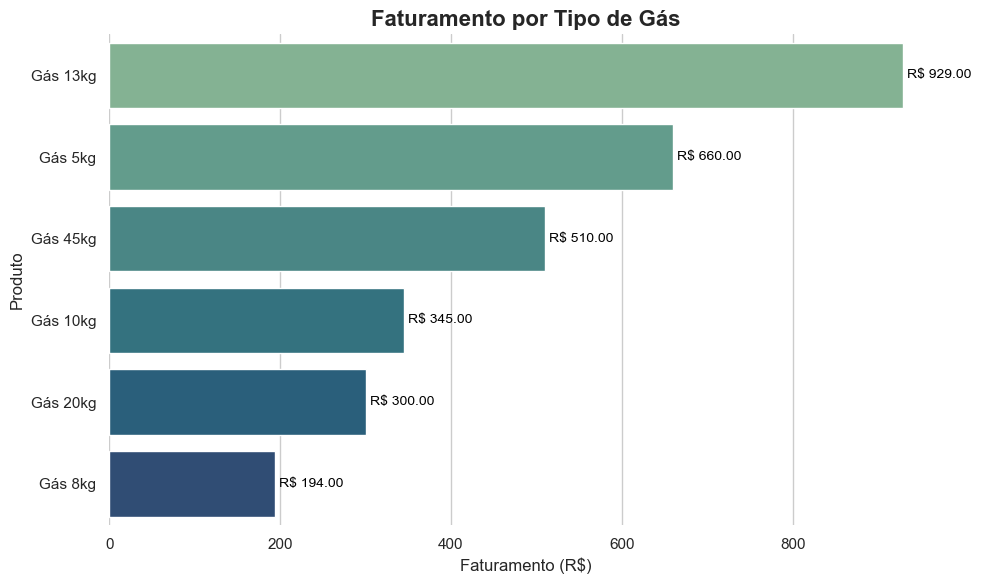

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo profissional
sns.set(style="whitegrid")

# Criar DataFrame para facilitar a plotagem
df_plot = vendas_por_produto.reset_index()
df_plot.columns = ["Produto", "Faturamento"]

# Gráfico com hue definido
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_plot,
    x="Faturamento",
    y="Produto",
    hue="Produto",              # <— agora o palette é aplicado via hue
    palette="crest",
    dodge=False,
    legend=False               # remove legenda redundante
)

# Título e labels
plt.title("Faturamento por Tipo de Gás", fontsize=16, weight='bold')
plt.xlabel("Faturamento (R$)", fontsize=12)
plt.ylabel("Produto", fontsize=12)

# Adicionando rótulos nas barras
for i, v in enumerate(df_plot["Faturamento"]):
    ax.text(v + 5, i, f"R$ {v:.2f}", color='black', va='center', fontsize=10)

# Ajustes finais
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



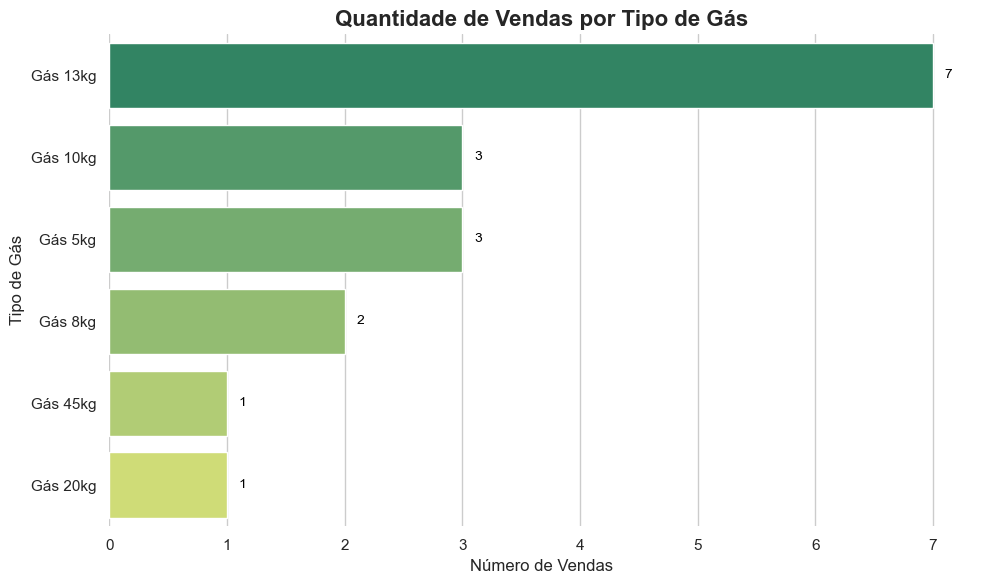

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo moderno
sns.set(style="whitegrid")

# Preparar os dados como DataFrame
df_plot = quantidade_por_produto.reset_index()
df_plot.columns = ["Produto", "Quantidade"]

# Criar gráfico com hue e palette funcionando corretamente
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_plot,
    x="Quantidade",
    y="Produto",
    hue="Produto",           # necessário para aplicar `palette`
    palette="summer",
    dodge=False,
    legend=False             # evita legenda redundante
)

# Título e eixos
plt.title("Quantidade de Vendas por Tipo de Gás", fontsize=16, weight='bold')
plt.xlabel("Número de Vendas", fontsize=12)
plt.ylabel("Tipo de Gás", fontsize=12)

# Rótulos nas barras
for i, valor in enumerate(df_plot["Quantidade"]):
    ax.text(valor + 0.1, i, str(valor), color='black', va='center', fontsize=10)

# Limpeza visual
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



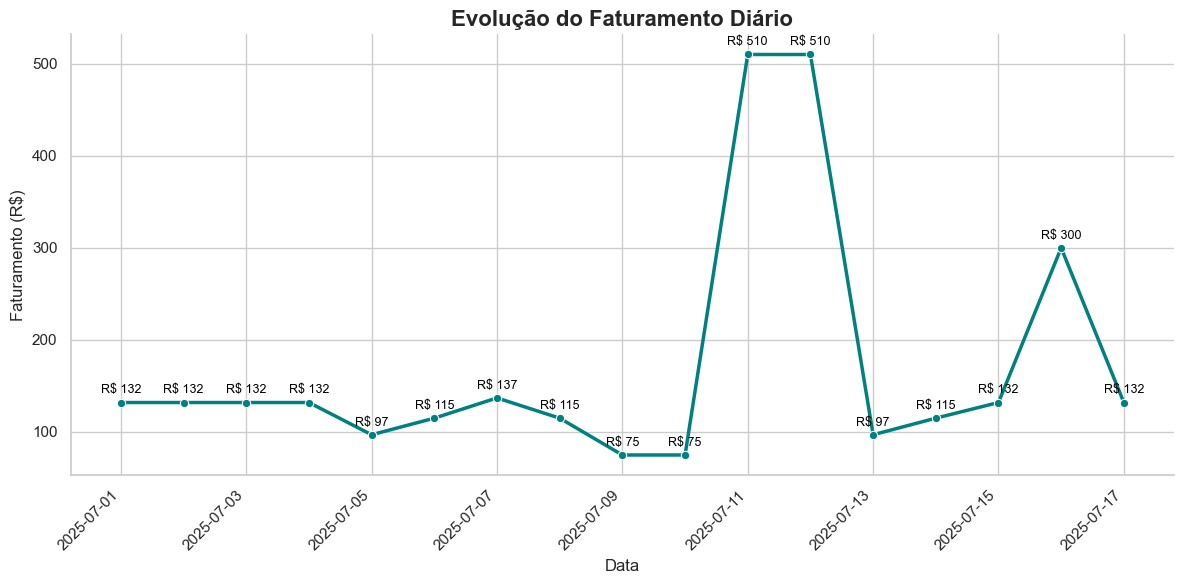

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mais moderno e limpo
sns.set(style="whitegrid")

# Agrupando os dados
df["Data"] = pd.to_datetime(df["Data"])
vendas_diarias = df.groupby("Data")["Valor"].sum()

# Criando gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x=vendas_diarias.index,
    y=vendas_diarias.values,
    marker='o',
    linewidth=2.5,
    color='teal'
)

# Título e rótulos com fonte maior
plt.title("Evolução do Faturamento Diário", fontsize=16, weight='bold')
plt.xlabel("Data", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)

# Rotação e espaçamento dos rótulos do eixo X
plt.xticks(rotation=45, ha='right')

# Adicionando valor no topo de cada ponto
for x, y in zip(vendas_diarias.index, vendas_diarias.values):
    ax.text(x, y + 10, f"R$ {y:.0f}", color='black', ha='center', fontsize=9)

# Remover bordas visuais
sns.despine()
plt.tight_layout()
plt.show()



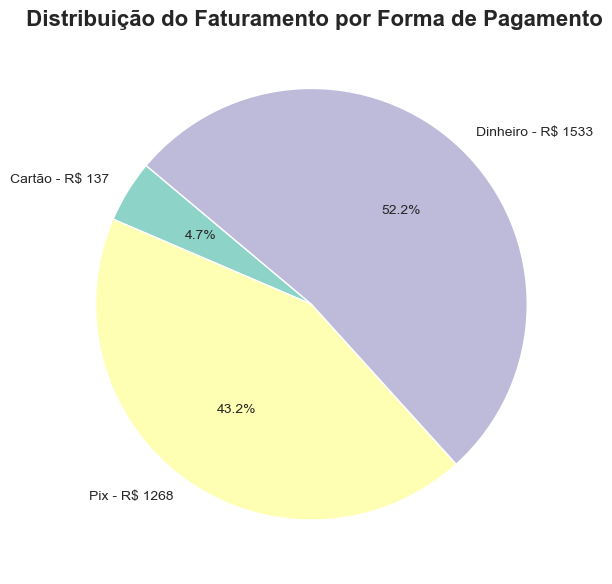

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparando os dados
faturamento_pagamento = df.groupby("Forma_Pagamento")["Valor"].sum().sort_values()

# Estilo moderno
sns.set(style="white")

# Cores personalizadas
cores = sns.color_palette("Set3", len(faturamento_pagamento))

# Rótulos com nome + valor
labels = [f"{pagamento} - R$ {valor:.0f}" for pagamento, valor in faturamento_pagamento.items()]

# Criando gráfico
plt.figure(figsize=(8, 6))
plt.pie(
    faturamento_pagamento.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=cores,
    textprops={'fontsize': 10}
)

plt.title(" Distribuição do Faturamento por Forma de Pagamento", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()
